In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)

In [2]:
df = pd.read_csv("../data/new_data.csv")
print('new data size', df.shape)

new data size (2026, 19)


In [4]:
X = df[["Attrition_Flag","Customer_Age","Gender","Dependent_count",
             "Education_Level","Marital_Status","Income_Category","Card_Category",
             "Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon",
             "Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal",
             "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt",
             "Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]]

In [7]:
etr = pickle.load(open('../models/finalized_model.sav', 'rb'))

In [8]:
y_pred = etr.predict(X)

In [11]:
df_ = pd.read_csv('../data/compare_data.csv')
y_test = df_["Avg_Utilization_Ratio"]

In [13]:
df['Avg_Utilization_Ratio'] = etr.predict(X)
df.to_csv('../data/prediction_results.csv', index=False)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [15]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", evs)

Mean Squared Error: 7.884304047384008e-05
Mean Absolute Error: 0.0051214215202369205
R-squared: 0.9989938383346113
Explained Variance Score: 0.9989938925064259


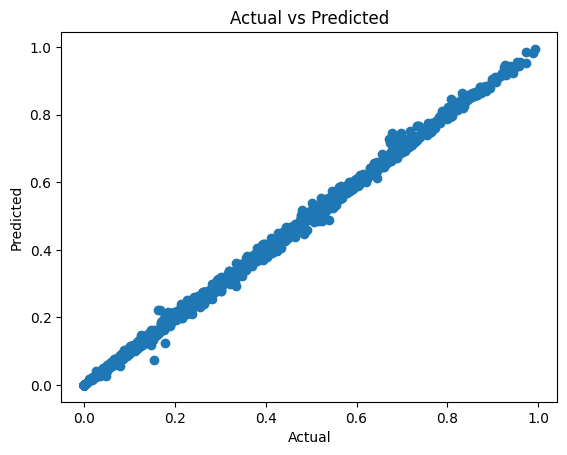

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()